# Carga de datos 

In [1]:
import pandas as pd

import numpy as np


datos = pd.read_excel('dignatarios 2012-2019.xlsx')#se carga la base de datos

#Transformación de las variables categóricas

df = pd.DataFrame(data=datos) #Se crea un dataframe con los datos

# Transformación de variables categóricas

In [2]:
#Para categorias específicas
uniq_lab = np.unique(df['ANNO_DIGNATARIO'])#Categorías de categoría ANNO_DIGNATARIO
for lab in uniq_lab:#Ciclo para cada categoría 
    df['ANNO_DIGNATARIO'].replace(lab,np.where(uniq_lab == lab)[0][0].astype(int),inplace=True) #Se reemplaza la variable categórica por la numérica  

uniq_lab = np.unique( df['ORGANIZACION'])#Categorías de característica ORGANIZACION
for lab in uniq_lab:
    df['ORGANIZACION'].replace(lab,np.where(uniq_lab == lab)[0][0].astype(int),inplace=True) 
    
uniq_lab = np.unique( df['TIPO_ORG'])#Categorías de característica TIPO_ORG
for lab in uniq_lab:
    df['TIPO_ORG'].replace(lab,np.where(uniq_lab == lab)[0][0].astype(int),inplace=True) 
    
uniq_lab = np.unique( df['GENERO_'])#Categorías de característica GENERO_
for lab in uniq_lab:
    df['GENERO_'].replace(lab,np.where(uniq_lab == lab)[0][0].astype(int),inplace=True) 
    
uniq_lab = np.unique( df['CARGO'])#Categorías de característica CARGO
for lab in uniq_lab:
    df['CARGO'].replace(lab,np.where(uniq_lab == lab)[0][0].astype(int),inplace=True)

df    

,ANNO_DIGNATARIO,COMUNA,ORGANIZACION,TIPO_ORG,GENERO_,CARGO
0,0,1,216,1,1,120
1,0,1,216,1,1,151
2,0,1,216,1,0,139
3,0,1,216,1,1,71
4,0,1,216,1,0,131
5,0,1,216,1,0,50
6,0,1,216,1,0,101
7,0,1,216,1,0,17
8,0,1,216,1,1,18
9,0,1,216,1,1,19


# Revisión de valores nan

In [3]:
from sklearn import preprocessing
from collections import defaultdict

nombreCol = datos.columns.tolist()

for column in nombreCol:
    print("Valores nulos <{0}>: {1}".format(column, datos[column].isnull().sum()))

Valores nulos <ANNO_DIGNATARIO>: 0
Valores nulos <COMUNA>: 0
Valores nulos <ORGANIZACION>: 0
Valores nulos <TIPO_ORG>: 0
Valores nulos <GENERO_>: 0
Valores nulos <CARGO>: 0


# Manejo de Outliers

In [4]:
from pandas.api.types import is_numeric_dtype

def remove_outlier(df):
    low = .05
    high = .95
    quant_df = df.quantile([low, high])
    for name in list(df.columns):
        if is_numeric_dtype(df[name]):
            df = df[(df[name] >= quant_df.loc[low, name]) & (df[name] <= quant_df.loc[high, name])]
    return df



df_sinOutLiers = remove_outlier(df)
datosNuevos = df_sinOutLiers.values
df_sinOutLiers

,ANNO_DIGNATARIO,COMUNA,ORGANIZACION,TIPO_ORG,GENERO_,CARGO
314,0,2,249,1,1,120
315,0,2,249,1,1,155
316,0,2,249,1,1,151
317,0,2,249,1,0,139
318,0,2,249,1,1,71
319,0,2,249,1,1,62
320,0,2,249,1,0,50
321,0,2,249,1,0,86
322,0,2,249,1,1,17
323,0,2,249,1,1,18


# Escalamiento de datos

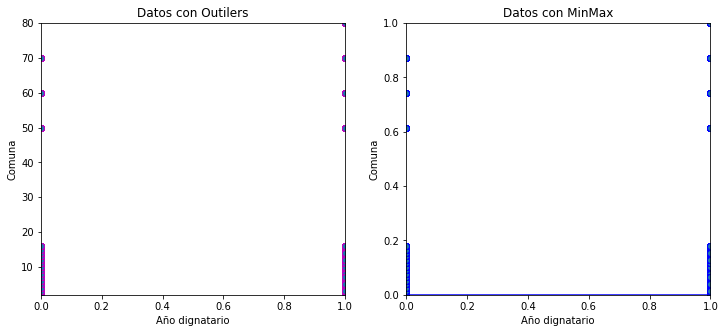

In [6]:
import numpy as np  # Librería numpy pora las operaciones matemáticas
from matplotlib import pyplot # Librería para hacer gráficas
import random # para generar datos aleatorios de forma uniforme 
from sklearn.preprocessing import MinMaxScaler # MinMaxScaler es una librería que permite hacer diferentes escalas de los
                                                 #datos cuando ajustes de valores máximos y mínimos.  
    
MinMax_1 = MinMaxScaler(copy=True, feature_range=(0, 1)) # Método MinMax con valores entre 0 y 1

datosEscalados = MinMax_1.fit_transform(datosNuevos) # Transformación de los nuevos datos con una escala MinMax

fig = pyplot.figure(figsize=(12,5)) # Se define el tamaño de la figura en ancho y altura    
    
ax = fig.add_subplot(1, 2, 1)   
ax.scatter(datosNuevos[:,0], datosNuevos[:,1], edgecolors="m")
pyplot.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
pyplot.xlim(datosNuevos[:,0].min(), datosNuevos[:,0].max()) # Definir el rango de valores que desea que aparezca en el gráfico en el eje x
pyplot.ylim(datosNuevos[:,1].min(), datosNuevos[:,1].max()) # Definir el rango de valores que desea que aparezca en el gráfico en el eje y
pyplot.title('Datos con Outilers') # Titulo de la gráfica
pyplot.xlabel('Año dignatario') # Etiqueta del eje x
pyplot.ylabel('Comuna') # Etiqueta del eje y

ax = fig.add_subplot(1, 2, 2) 
ax.scatter(datosEscalados[:,0], datosEscalados[:,1], edgecolors="b")
pyplot.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
pyplot.xlim(datosEscalados[:,0].min(), datosEscalados[:,0].max()) # Definir el rango de valores que desea que aparezca en el gráfico en el eje x
pyplot.ylim(datosEscalados[:,1].min(), datosEscalados[:,1].max()) # Definir el rango de valores que desea que aparezca en el gráfico en el eje y
pyplot.title('Datos con MinMax') # Titulo de la gráfica
pyplot.xlabel('Año dignatario') # Etiqueta del eje x
pyplot.ylabel('Comuna') # Etiqueta del eje y

pyplot.show()

# Normalización

In [7]:
xmax = np.amax(datosNuevos, axis=0) # Se determina los máximos valores de la matriz de datos por columna
xmin = np.amin(datosNuevos, axis=0) # Se determina los minimos valores de la matriz de datos por columna
N,D = datosNuevos.shape # Dimenisones de los datos

datosNormalizados = np.zeros( (N,D) ) # Se construye una matriz de ceros de N x D para luego actualizar con los datos nuevos
for d in np.arange(D):
    for n in np.arange(N):
        datosNormalizados[n][d] = (datosNuevos[n][d] - xmin[d])/(xmax[d] - xmin[d]) # Se aplica el método 4
        
datosNormalizados

#Solo se usa si es necesario

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  


array([[0.        , 0.        , 0.52235294,        nan, 1.        ,
        0.74637681],
       [0.        , 0.        , 0.52235294,        nan, 1.        ,
        1.        ],
       [0.        , 0.        , 0.52235294,        nan, 1.        ,
        0.97101449],
       ...,
       [1.        , 0.06410256, 0.56      ,        nan, 1.        ,
        0.10869565],
       [1.        , 0.06410256, 0.56      ,        nan, 1.        ,
        0.13043478],
       [1.        , 0.06410256, 0.56      ,        nan, 1.        ,
        0.63768116]])

# Reducción de dimensionalidad

In [8]:
from sklearn.decomposition import PCA # Cargamos el método PCA

Componentes = PCA(iterated_power='auto', n_components = 6, random_state=None,
                  svd_solver='auto', tol=0.0, whiten=False) # Calcular los valores de las componentes principales


Variables_Principales = Componentes.fit_transform(datosEscalados) 
# Transformarmos las componentes principales a partir de los datos 

Varianza = Componentes.explained_variance_ratio_ # Calculamos la tasa de varianza de las componentes y generamos las 
                                                 # componentes principales   
Varianza

array([3.13669106e-01, 3.09639173e-01, 1.69218428e-01, 1.42165718e-01,
       6.53075746e-02, 3.61752886e-36])

[0.31366911 0.62330828 0.79252671 0.93469243 1.         1.        ]


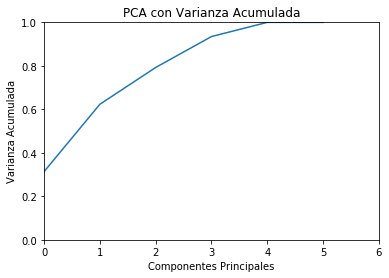

In [9]:
#Varianza acumulada
fil, col = datosEscalados.shape

ALL_PCA = PCA(col, random_state=None,
                 svd_solver='auto', tol=0.0, whiten=False).fit(datosEscalados)
ALL_Componentes = np.cumsum(ALL_PCA.explained_variance_ratio_)
print(ALL_Componentes)

pyplot.plot(np.arange(len(ALL_Componentes)), ALL_Componentes)
pyplot.xlabel('Componentes Principales')
pyplot.ylabel('Varianza Acumulada')
pyplot.title('PCA con Varianza Acumulada')
pyplot.xlim(0, len(ALL_Componentes))
pyplot.ylim(0, 1)
pyplot.show()

In [10]:
Valores_Singulares = Componentes.singular_values_ # Se calcula los valores singulares por componente principal
Valores_Singulares #Para verificar cuales componentes son las que acumulan la mayor cantidad de información

array([5.04976587e+01, 5.01722202e+01, 3.70902020e+01, 3.39963907e+01,
       2.30418395e+01, 1.71491016e-16])

In [11]:
#Se usa el 95% de varianza para explicar el modelo
Nuevas_Componentes = PCA(0.95, random_state=None,
                         svd_solver='auto', tol=0.0, whiten=False) 
Nuevos_Datos = Nuevas_Componentes.fit_transform(datosEscalados) 
print(datosEscalados.shape) # Tamaño de los datos originales
print(Nuevos_Datos.shape)

(10118, 6)
(10118, 5)


In [12]:
X_Reconstruido = Nuevas_Componentes.inverse_transform(Nuevos_Datos)#Se reconstruye el modelo a partir de las componentes principales
X_Reconstruido.shape

(10118, 6)

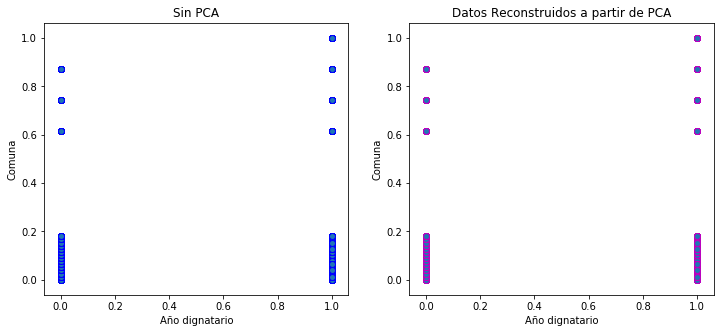

In [13]:
#Comparación gráfica con PCA y sin PCA
fig = pyplot.figure(figsize=(12,5)) # Se define el tamaño de la figura en ancho y altura 

ax = fig.add_subplot(1, 2, 1) 
ax.scatter(datosEscalados[:,0], datosEscalados[:,1], edgecolors="b")
pyplot.xlabel('Año dignatario')
pyplot.ylabel('Comuna')
pyplot.title('Sin PCA')

ax = fig.add_subplot(1, 2, 2) 
ax.scatter(X_Reconstruido[:,0], X_Reconstruido[:,1], edgecolors="m")
pyplot.xlabel('Año dignatario')
pyplot.ylabel('Comuna')
pyplot.title('Datos Reconstruidos a partir de PCA')

pyplot.show()

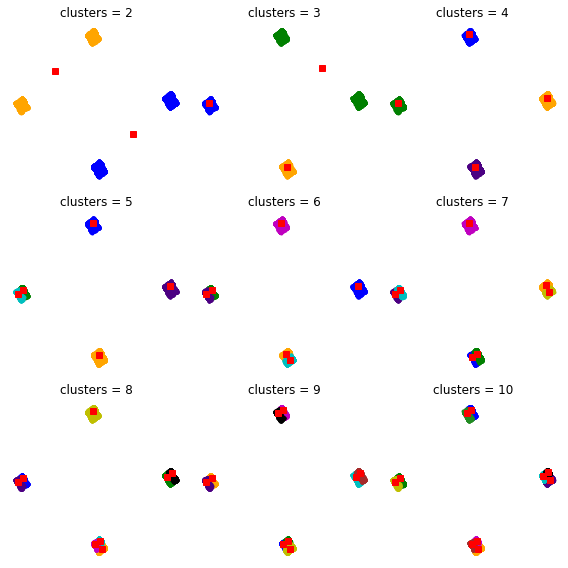

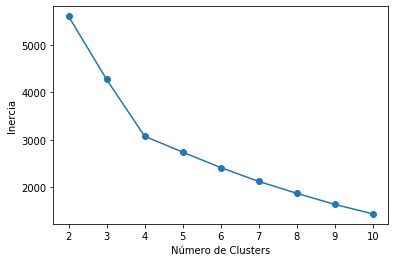

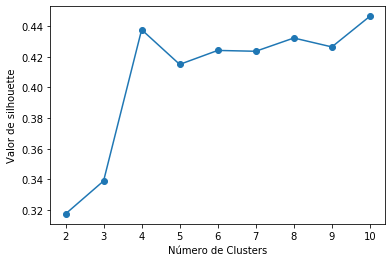

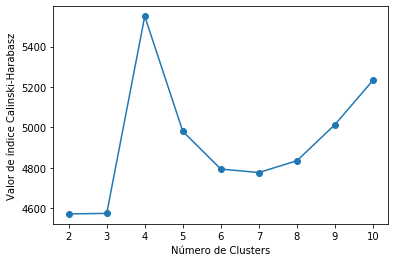

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score # Método de validación silhouette
from sklearn.metrics import calinski_harabasz_score # Método de validación Calinski-Harabasz

from sklearn.utils import check_random_state # Es una librería para definir un generador de números aleatorios a partir de
                                             # de la librería numpy

mantener_valor_aleatorio = check_random_state(1000)
xpts =  Nuevos_Datos[:,0]
ypts =  Nuevos_Datos[:,1]

inercia = []
silhouette_valores = []
ch_valores = []

colors = ['b', 'orange', 'g', 'indigo', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

fig1, axes1 = pyplot.subplots(3, 3, figsize=(8, 8))

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    # Se construye el modelo Kmeans
    # n_clusters es el número de clusters
    # init es la condición inicial de los centros. 'random' signfica que se genera aleatoriamente los centros.
    # Se puede usar en int la opción ‘k-means++’, el cual selecciona los centros iniciales del cluster para
    # que el algoritmo de una manera inteligente converga rápidamente. Se aconseja usar esta opción para datos de alta
    # dimensionalidad.
    # n_init es el número de veces que el algoritmo actualiza los centros. Por defecto es 10 pero puedes cambiar el valor.
    # tol es el error que se desea superar.
    # max_iter es el número de iteraciones.
    # precompute_distances es una opción para pre-calcular las distancias. Si seleccionas 'True', entonces siempre se pre-calcula
    # las distancias. Si es 'False', entonces nunca se pre-calcula las distancias. Si es 'auto', entonces se selecciona
    # 'True' o 'False' de acuerdo al número de muestras y el número de clases. Se recomienda esta última opción.
    # algorithm es el algoritmo K-means a utilizar. Si es "full", se aplica el estilo clásico del algoritmo. Si es "elkan",
    # se aplica una variación del algoritmo k-means para mayor eficiencia pero se recomienda para datos que no esten tan
    # esparcidos. Si es "auto", entonces selecciona "elkan" si los datos son densos o "full" si los datos son esparcidos.
    Modelo_Kmeans = KMeans(n_clusters = ncenters, init = 'random', n_init = 20, max_iter = 1000, tol = 1e-4,
                      precompute_distances = 'auto', random_state = mantener_valor_aleatorio, algorithm = 'auto')
    Modelo_Kmeans.fit_predict(Nuevos_Datos) # se predice las etiquetas que se asocian a los datos
    Etiquetas = Modelo_Kmeans.labels_ # Calcula las clases o etiquetas
    centros = Modelo_Kmeans.cluster_centers_ # Calcula la matriz de centros
    inercia.append(Modelo_Kmeans.inertia_) # optimiza el punto de inercia de acuerdo al número de clusters
    silhouette_valores.append(silhouette_score(Nuevos_Datos, Etiquetas)) # Se aplica la métrica Silhouette
    ch_valores.append(calinski_harabasz_score(Nuevos_Datos, Etiquetas)) # Se aplica la métrica Calinski-Harabasz
    
    for j in range(ncenters):
        ax.plot(xpts[Etiquetas == j],
                ypts[Etiquetas == j], '.', color=colors[j])

    for pt in centros:
        ax.plot(pt[0], pt[1], 'rs')
    
    ax.set_title('clusters = {0}'.format(ncenters))
    ax.axis('off') 

fig1.tight_layout()
pyplot.show()

fig2, ax2 = pyplot.subplots()
ax2.plot(np.r_[2:11], inercia, marker = 'o')
ax2.set_xlabel("Número de Clusters")
ax2.set_ylabel("Inercia")
pyplot.show()

fig3, ax3 = pyplot.subplots()
ax3.plot(np.r_[2:11], silhouette_valores, marker = 'o')
ax3.set_xlabel("Número de Clusters")
ax3.set_ylabel("Valor de silhouette")
pyplot.show()

fig3, ax3 = pyplot.subplots()
ax3.plot(np.r_[2:11], ch_valores, marker = 'o')
ax3.set_xlabel("Número de Clusters")
ax3.set_ylabel("Valor de índice Calinski-Harabasz")
pyplot.show()